# Name : Somya Dhar
# Id : 18-36396-1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train_norma = x_train.reshape(-1, 28,28,1)/ 255
x_test_norma = x_test.reshape(-1, 28,28,1)/ 255

In [4]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                6416      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model_adam=model
model_sgd=model
model_rmsprop=model

In [6]:
model_adam.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
model_sgd.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
model_rmsprop.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Without normalized data

In [9]:

h = model_adam.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8028 - accuracy: 0.8085 - val_loss: 0.1647 - val_accuracy: 0.9539
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1344 - accuracy: 0.9628 - val_loss: 0.0984 - val_accuracy: 0.9732
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0926 - accuracy: 0.9745 - val_loss: 0.0909 - val_accuracy: 0.9730
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0739 - accuracy: 0.9788 - val_loss: 0.0832 - val_accuracy: 0.9780
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0632 - accuracy: 0.9818 - val_loss: 0.0827 - val_accuracy: 0.9793


In [10]:
test_loss, test_acc = model_adam.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9829

Test accuracy: 0.9829000234603882


In [11]:
x = model_sgd.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0572 - accuracy: 0.9838 - val_loss: 0.0903 - val_accuracy: 0.9783
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 0.1134 - val_accuracy: 0.9763
Epoch 3/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0778 - val_accuracy: 0.9820
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0467 - accuracy: 0.9870 - val_loss: 0.0951 - val_accuracy: 0.9777
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0449 - accuracy: 0.9872 - val_loss: 0.0898 - val_accuracy: 0.9801


In [12]:
test_loss, test_acc = model_sgd.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0816 - accuracy: 0.9809

Test accuracy: 0.98089998960495


In [13]:
y = model_rmsprop.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0429 - accuracy: 0.9878 - val_loss: 0.0828 - val_accuracy: 0.9827
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0440 - accuracy: 0.9877 - val_loss: 0.1017 - val_accuracy: 0.9804
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0415 - accuracy: 0.9882 - val_loss: 0.1088 - val_accuracy: 0.9795
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.0915 - val_accuracy: 0.9809
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0903 - val_accuracy: 0.9795


In [14]:
test_loss, test_acc = model_rmsprop.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0716 - accuracy: 0.9825

Test accuracy: 0.9825000166893005


### Adam vs SGD vs  RMSProp (without normalized)

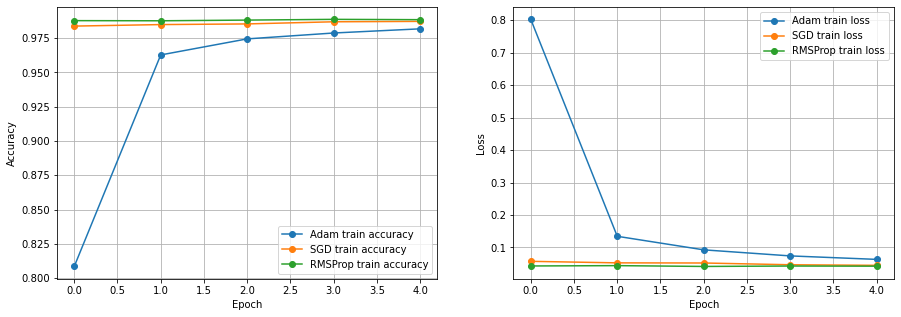

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Adam train loss')
plt.plot(x.history['loss'], 'o-', label='SGD train loss')
plt.plot(y.history['loss'], 'o-', label='RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Adam vs SGD vs Rmsporp

Among the 3 optimization functions, the main difference is first-time Adam model accuracy is vary lessthan others. Then adam accuracy increase with every epoch.SGD and Rmsprop have almost higher accuracy in the first Epoch then it slides increases(negligible) . But I show sometimes accuracy is gone down from more epochs. (for this model myabe for overfitting).

From the above graph, we can understand that among the three optimizer functions Rmsprop has more accuracy (98.85). It is less different from the SGD function. But when we compare all three functions in the model evaluate we find Adam used model has more accuracy (98.29) than the other.
Rmsprop function needs more time for training than other functions.


Without normalized data, we can say that the optimization of different functions has less accuracy than normalize data. Here Adam is good for evaluate.

### If we consider less epoch for traning then SGD and Rmsporp  give high accuracy in 1st epoch.





# Normalized data 

In [16]:
h_norma = model_adam.fit(x=x_train_norma, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3700 - accuracy: 0.8868 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0757 - accuracy: 0.9766 - val_loss: 0.0683 - val_accuracy: 0.9787
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0723 - val_accuracy: 0.9796
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.0565 - val_accuracy: 0.9835
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.9826


In [17]:
test_loss, test_acc = model_adam.evaluate(x_test_norma, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.9848

Test accuracy: 0.9847999811172485


In [18]:
x_norma = model_sgd.fit(x=x_train_norma, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0526 - val_accuracy: 0.9852
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0330 - accuracy: 0.9902 - val_loss: 0.0518 - val_accuracy: 0.9858
Epoch 5/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0558 - val_accuracy: 0.9850


In [19]:
test_loss, test_acc = model_sgd.evaluate(x_test_norma, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9869

Test accuracy: 0.9868999719619751


In [20]:
y_norma = model_rmsprop.fit(x=x_train_norma, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.0536 - val_accuracy: 0.9857
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0557 - val_accuracy: 0.9863
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.0565 - val_accuracy: 0.9860
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.0577 - val_accuracy: 0.9857
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0522 - val_accuracy: 0.9862


In [21]:
test_loss, test_acc = model_rmsprop.evaluate(x_test_norma, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9879

Test accuracy: 0.9879000186920166


### Normalized vs without Normalized data (adam)

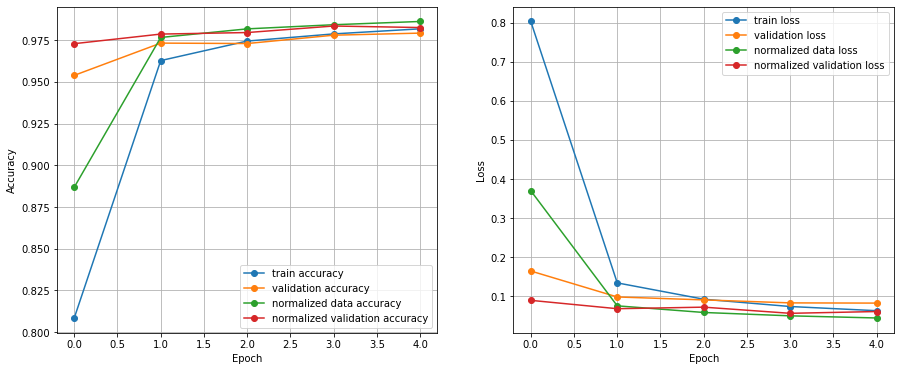

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_norma.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_norma.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_norma.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_norma.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Analyzing the affect of using and not using data normalization:



#### By using normalized data in this model we get more accuracy than before. 
You can see in the above graph that Adam's function is much better accuracy in 1st epoch for normalized data. Then it increases continuously. For Adam function after 1 epoch with and without normalized increasing rate is almost the same. 
Furthermore, we can also see that in normalize data losses also decrease than before.

From the below visualization graph, we find in every optimisation function has more accuracy for normalization data.

### For  accuracy (evalute function)
                                   Normalized                      without normalized 

 Adam     ..... .             Normalized  =                   98.47 ,   .....            without normalized =            98.29

 SGD       ..... .            Normalized  =               98.68      ,    .....         without normalized =             98.08

 RMSprop    .....  .          Normalized  =            98.79      ,      .....         without normalized =           98.25

#### In a nutshell for this mnist data set Adam optimizer functions with normalization, data is best for training accuracy.





# Visualisation of normalised data in different optimisation function (Adam/she/Rmsprop) below

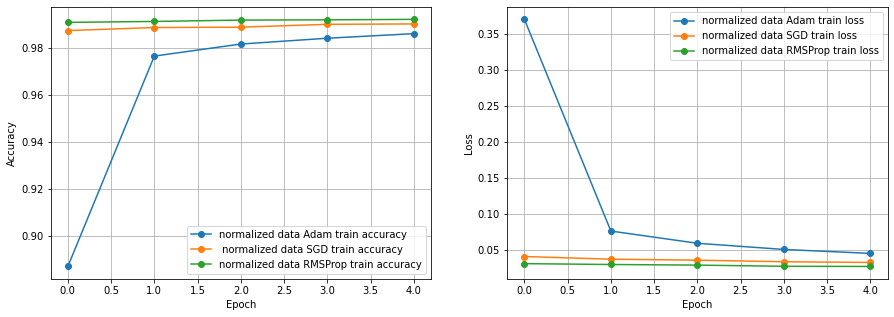

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_norma.history['accuracy'], 'o-', label='normalized data Adam train accuracy')
plt.plot(x_norma.history['accuracy'], 'o-', label=' normalized data SGD train accuracy')
plt.plot(y_norma.history['accuracy'], 'o-', label='normalized data RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_norma.history['loss'], 'o-', label='normalized data Adam train loss')
plt.plot(x_norma.history['loss'], 'o-', label='normalized data SGD train loss')
plt.plot(y_norma.history['loss'], 'o-', label='normalized data RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
predictions = model_adam.predict(x_test)

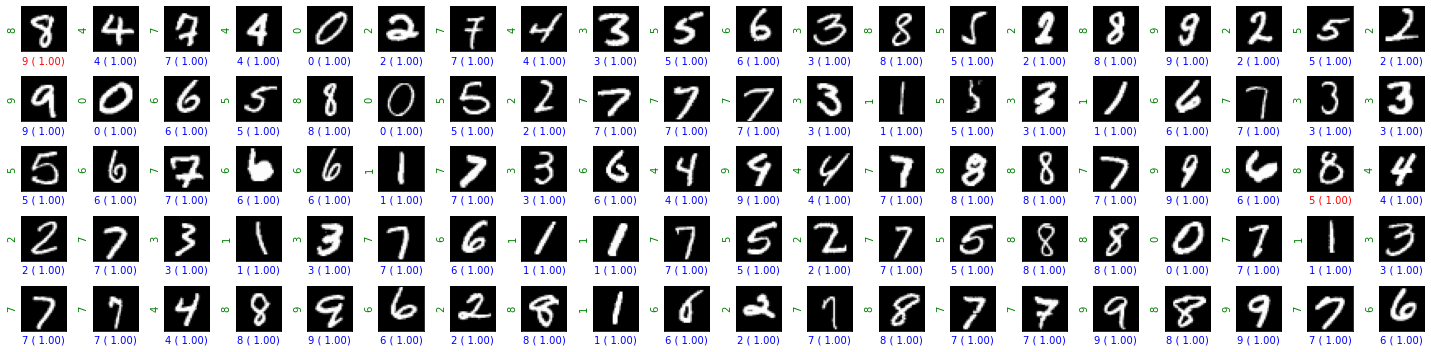

In [25]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model_adam.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

### Thank you